Problem statement

The May edition of the 2022 Tabular Playground series binary classification problem that includes a number of different feature interactions. This competition is an opportunity to explore various methods for identifying and exploiting these feature interactions.

Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import os

path = "../coal-price-data/binary_classification"
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../coal-price-data/binary_classification/sample_submission.csv
../coal-price-data/binary_classification/train.csv
../coal-price-data/binary_classification/test.csv


Read files

In [6]:
train = pd.read_csv(f"{path}/train.csv")
test = pd.read_csv(f"{path}/test.csv")
submission = pd.read_csv(f"{path}/sample_submission.csv")

In [7]:
train

id      f_00      f_01      f_02      f_03      f_04      f_05  \
0            0 -1.373246  0.238887 -0.243376  0.567405 -0.647715  0.839326   
1            1  1.697021 -1.710322 -2.230332 -0.545661  1.113173 -1.552175   
2            2  1.681726  0.616746 -1.027689  0.810492 -0.609086  0.113965   
3            3 -0.118172 -0.587835 -0.804638  2.086822  0.371005 -0.128831   
4            4  1.148481 -0.176567 -0.664871 -1.101343  0.467875  0.500117   
...        ...       ...       ...       ...       ...       ...       ...   
899995  899995  1.380145 -0.038884  0.597111  0.854560  0.684301 -1.058618   
899996  899996 -1.369789  0.044841  0.015458  0.376565 -0.380529 -0.830815   
899997  899997  1.386201 -0.961150  0.725994 -0.132844  0.873911 -0.245339   
899998  899998 -1.590572 -0.509938 -1.715397 -0.249988  1.359933  1.650808   
899999  899999 -0.636210 -0.425986 -1.826699 -0.598797  1.589577 -0.482298   

            f_06  f_07  f_08  ...      f_22      f_23      f_24      f_25  \
0       0.113133     1     5  ... -2.540739  0.766952 -2.730628 -0.208177   
1       0.447825     1     3  ...  2.278315 -0.633658 -1.217077 -3.782194   
2      -0.708660     1     0  ... -1.385775 -0.520558 -0.009121  2.788536   
3      -0.282575     3     2  ...  0.572594 -1.653213  1.686035 -2.533098   
4       0.407515     3     3  ... -3.912929 -1.430366  2.127649 -3.306784   
...          ...   ...   ...  ...       ...       ...       ...       ...   
899995  1.310699     2     1  ... -1.594744  0.522019  0.833047  2.714125   
899996 -1.798458     4     1  ...  2.413899 -0.674942 -0.412111 -0.030436   
899997 -1.045786     0     0  ... -0.151930 -4.560773 -1.249154  1.793535   
899998 -0.058592     0     2  ...  2.423670  2.110008  0.561271 -2.149610   
899999 -0.214093     7     1  ...  1.340696  3.762351  1.797137 -0.412837   

            f_26        f_27        f_28  f_29  f_30  target  
0       1.363402  ABABDADBAB   67.609153     0     0       0  
1      -0.058316  ACACCADCEB  377.096415     0     0       1  
2      -3.703488  AAAEABCKAD -195.599702     0     2       1  
3      -0.608601  BDBBAACBCB  210.826205     0     0       1  
4       4.371371  BDBCBBCHFE -217.211798     0     1       1  
...          ...         ...         ...   ...   ...     ...  
899995  1.290094  BABBCBBBED  455.033851     0     2       1  
899996 -3.144047  BBBGBBDQBE  134.703577     0     1       0  
899997  2.253696  AEBEDBBHBA  -99.536313     0     1       0  
899998  1.019982  ADBAAADDAE   47.823039     1     2       0  
899999  2.090440  BCAACADSCE  -44.559296     0     2       1  

[900000 rows x 33 columns]

In [5]:
test

id      f_00      f_01      f_02      f_03      f_04      f_05  \
0        900000  0.442517  0.174380 -0.999816  0.762741  0.186778 -1.074775   
1        900001 -0.605598 -0.305715  0.627667 -0.578898 -1.750931  1.355550   
2        900002  0.303990  2.445110  0.246515  0.818248  0.359731 -1.331845   
3        900003  0.154053  0.260126 -1.367092 -0.093175 -1.111034 -0.948481   
4        900004 -1.651904 -0.424266 -0.667356 -0.322124 -0.089462  0.181705   
...         ...       ...       ...       ...       ...       ...       ...   
699995  1599995  0.640110  0.897808 -0.523956  1.563760 -0.092281 -0.610867   
699996  1599996 -0.191771 -0.035246 -0.118533  0.584750  2.126977  0.568659   
699997  1599997 -0.331704 -0.328845 -1.185503  1.022128 -0.483099 -0.107146   
699998  1599998 -2.031073 -1.238398  0.964699 -1.045950  0.906064  0.634301   
699999  1599999 -0.085906 -0.002124  2.227375  0.217145  3.179153 -1.660188   

            f_06  f_07  f_08  ...      f_21      f_22      f_23      f_24  \
0       0.501888     6     6  ... -1.006400 -1.193879 -2.435736 -2.427430   
1      -0.190911     1     3  ...  2.382405  0.149442  1.883322 -2.848714   
2       1.358622     3     3  ... -7.026098  1.312277 -5.157192  1.714005   
3       1.119220     0     0  ... -0.594532 -3.939475  1.754570 -2.364007   
4       1.784983     2     2  ...  0.084906 -0.985736 -0.130467 -3.557893   
...          ...   ...   ...  ...       ...       ...       ...       ...   
699995  0.535426     0     1  ...  2.604048  1.122867  0.518110  1.243837   
699996 -0.052663     4     3  ...  3.029857  1.384682 -1.135740  2.982713   
699997 -0.968281     1     1  ...  4.021273 -1.845266  1.096011 -2.734508   
699998 -0.707474     5     1  ...  1.453864 -1.696606  1.018995  1.973697   
699999  0.891989     0     3  ... -3.549082 -4.325318 -5.017221  0.251268   

            f_25      f_26        f_27        f_28  f_29  f_30  
0      -1.966887  5.734205  BAAABADLAC   99.478419     0     0  
1      -0.725155  3.194219  AFABBAEGCB  -65.993825     1     0  
2       0.585032  0.066898  BBACABBKEE  -87.405622     0     1  
3      -1.003320  3.893099  AEBEAACQCC -281.293460     0     0  
4       1.210687  1.861884  AEBBBBDABF   25.629415     0     2  
...          ...       ...         ...         ...   ...   ...  
699995  0.575111  0.076372  BCBCEBHMCD  204.186539     0     0  
699996 -1.511760  2.225218  BAABCADQFC  -97.694591     0     2  
699997 -4.885955 -2.248739  AAAJCBGQBA  130.622745     1     0  
699998 -0.353068 -3.333449  BCBBCABNDE -364.625148     0     0  
699999 -3.236026 -0.362070  AFBEBACHFF -155.417342     0     1  

[700000 rows x 32 columns]

In [6]:
submission

id  target
0        900000     0.5
1        900001     0.5
2        900002     0.5
3        900003     0.5
4        900004     0.5
...         ...     ...
699995  1599995     0.5
699996  1599996     0.5
699997  1599997     0.5
699998  1599998     0.5
699999  1599999     0.5

[700000 rows x 2 columns]

Analyse

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900000 entries, 0 to 899999
Data columns (total 33 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      900000 non-null  int64  
 1   f_00    900000 non-null  float64
 2   f_01    900000 non-null  float64
 3   f_02    900000 non-null  float64
 4   f_03    900000 non-null  float64
 5   f_04    900000 non-null  float64
 6   f_05    900000 non-null  float64
 7   f_06    900000 non-null  float64
 8   f_07    900000 non-null  int64  
 9   f_08    900000 non-null  int64  
 10  f_09    900000 non-null  int64  
 11  f_10    900000 non-null  int64  
 12  f_11    900000 non-null  int64  
 13  f_12    900000 non-null  int64  
 14  f_13    900000 non-null  int64  
 15  f_14    900000 non-null  int64  
 16  f_15    900000 non-null  int64  
 17  f_16    900000 non-null  int64  
 18  f_17    900000 non-null  int64  
 19  f_18    900000 non-null  int64  
 20  f_19    900000 non-null  float64
 21  f_20    90

In [8]:
train.describe()

id           f_00           f_01           f_02  \
count  900000.000000  900000.000000  900000.000000  900000.000000   
mean   449999.500000      -0.000286       0.001165       0.001174   
std    259807.765473       0.998888       0.999193       1.000514   
min         0.000000      -4.599856      -4.682199      -4.642676   
25%    224999.750000      -0.675490      -0.675162      -0.674369   
50%    449999.500000       0.001144       0.002014       0.002218   
75%    674999.250000       0.674337       0.675021       0.677505   
max    899999.000000       4.749301       4.815699       4.961982   

                f_03           f_04           f_05           f_06  \
count  900000.000000  900000.000000  900000.000000  900000.000000   
mean       -0.001368      -0.000571       0.000284      -0.000709   
std         1.000175       1.000167       0.999875       0.999942   
min        -4.658816      -4.748501      -4.750214      -4.842919   
25%        -0.676114      -0.675909      -0.673437      -0.674876   
50%        -0.002227      -0.001662      -0.000438      -0.001492   
75%         0.672544       0.673789       0.675028       0.674749   
max         4.454920       4.948983       4.971881       4.822668   

                f_07           f_08  ...           f_21           f_22  \
count  900000.000000  900000.000000  ...  900000.000000  900000.000000   
mean        2.031460       2.057998  ...      -0.156307      -0.009273   
std         1.656172       1.590955  ...       2.484706       2.450797   
min         0.000000       0.000000  ...     -13.310146     -11.853530   
25%         1.000000       1.000000  ...      -1.820063      -1.645585   
50%         2.000000       2.000000  ...      -0.152668       0.030850   
75%         3.000000       3.000000  ...       1.507071       1.661676   
max        15.000000      16.000000  ...      14.455426      11.344080   

                f_23           f_24           f_25           f_26  \
count  900000.000000  900000.000000  900000.000000  900000.000000   
mean       -0.369459      -0.342738       0.176549       0.357591   
std         2.453405       2.386941       2.416959       2.476020   
min       -12.301097     -11.416189     -11.918306     -14.300577   
25%        -2.019739      -1.955956      -1.440424      -1.261598   
50%        -0.390966      -0.340746       0.160912       0.404212   
75%         1.255408       1.266673       1.795928       2.028219   
max        12.247100      12.389844      12.529179      12.913041   

                f_28           f_29           f_30         target  
count  900000.000000  900000.000000  900000.000000  900000.000000  
mean       -0.380876       0.345661       1.002654       0.486488  
std       238.773054       0.475584       0.818989       0.499818  
min     -1229.753052       0.000000       0.000000       0.000000  
25%      -159.427418       0.000000       0.000000       0.000000  
50%        -0.519808       0.000000       1.000000       0.000000  
75%       158.987357       1.000000       2.000000       1.000000  
max      1229.562577       1.000000       2.000000       1.000000  

[8 rows x 32 columns]

Analyse target

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='target', ylabel='Density'>

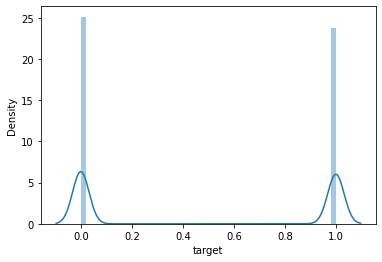

In [9]:
sns.distplot(train['target'])

Define target

In [10]:
target = train['target']
target

0         0
1         1
2         1
3         1
4         1
         ..
899995    1
899996    0
899997    0
899998    0
899999    1
Name: target, Length: 900000, dtype: int64

Combine train and test

In [11]:
combi = train.drop(['target'], axis=1).append(test)
combi = combi.drop(['id', 'f_27'], axis=1)
combi

f_00      f_01      f_02      f_03      f_04      f_05      f_06  \
0      -1.373246  0.238887 -0.243376  0.567405 -0.647715  0.839326  0.113133   
1       1.697021 -1.710322 -2.230332 -0.545661  1.113173 -1.552175  0.447825   
2       1.681726  0.616746 -1.027689  0.810492 -0.609086  0.113965 -0.708660   
3      -0.118172 -0.587835 -0.804638  2.086822  0.371005 -0.128831 -0.282575   
4       1.148481 -0.176567 -0.664871 -1.101343  0.467875  0.500117  0.407515   
...          ...       ...       ...       ...       ...       ...       ...   
699995  0.640110  0.897808 -0.523956  1.563760 -0.092281 -0.610867  0.535426   
699996 -0.191771 -0.035246 -0.118533  0.584750  2.126977  0.568659 -0.052663   
699997 -0.331704 -0.328845 -1.185503  1.022128 -0.483099 -0.107146 -0.968281   
699998 -2.031073 -1.238398  0.964699 -1.045950  0.906064  0.634301 -0.707474   
699999 -0.085906 -0.002124  2.227375  0.217145  3.179153 -1.660188  0.891989   

        f_07  f_08  f_09  ...      f_20      f_21      f_22      f_23  \
0          1     5     1  ... -0.919717  3.058541 -2.540739  0.766952   
1          1     3     4  ... -1.075434  2.179050  2.278315 -0.633658   
2          1     0     2  ... -3.485342 -0.784235 -1.385775 -0.520558   
3          3     2     1  ... -2.100177 -2.343819  0.572594 -1.653213   
4          3     3     0  ...  0.605033  1.133665 -3.912929 -1.430366   
...      ...   ...   ...  ...       ...       ...       ...       ...   
699995     0     1     6  ... -2.185190  2.604048  1.122867  0.518110   
699996     4     3     4  ... -0.239552  3.029857  1.384682 -1.135740   
699997     1     1     2  ... -0.922626  4.021273 -1.845266  1.096011   
699998     5     1     1  ... -3.079996  1.453864 -1.696606  1.018995   
699999     0     3     4  ... -2.128546 -3.549082 -4.325318 -5.017221   

            f_24      f_25      f_26        f_28  f_29  f_30  
0      -2.730628 -0.208177  1.363402   67.609153     0     0  
1      -1.217077 -3.782194 -0.058316  377.096415     0     0  
2      -0.009121  2.788536 -3.703488 -195.599702     0     2  
3       1.686035 -2.533098 -0.608601  210.826205     0     0  
4       2.127649 -3.306784  4.371371 -217.211798     0     1  
...          ...       ...       ...         ...   ...   ...  
699995  1.243837  0.575111  0.076372  204.186539     0     0  
699996  2.982713 -1.511760  2.225218  -97.694591     0     2  
699997 -2.734508 -4.885955 -2.248739  130.622745     1     0  
699998  1.973697 -0.353068 -3.333449 -364.625148     0     0  
699999  0.251268 -3.236026 -0.362070 -155.417342     0     1  

[1600000 rows x 30 columns]

Heatmap

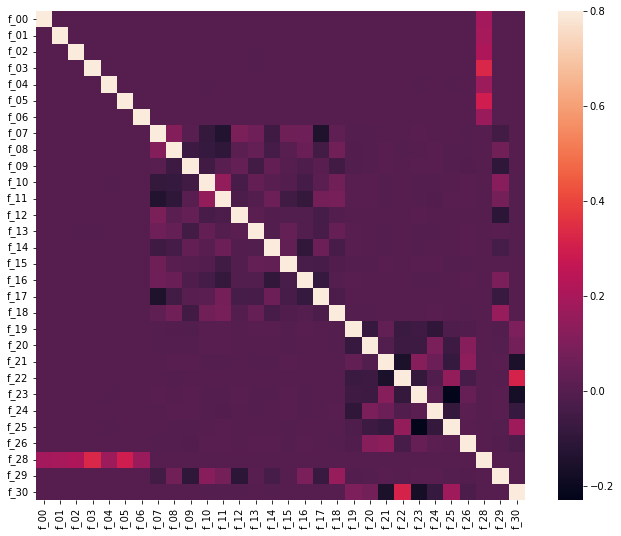

In [12]:
corr = combi.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=.8, square=True);

In [13]:
print(corr)

          f_00      f_01      f_02      f_03      f_04      f_05      f_06  \
f_00  1.000000 -0.000373 -0.000155 -0.001402 -0.000391 -0.000088 -0.001257   
f_01 -0.000373  1.000000  0.001066  0.000231 -0.001221  0.000028 -0.000963   
f_02 -0.000155  0.001066  1.000000 -0.000307  0.000768 -0.000394  0.000661   
f_03 -0.001402  0.000231 -0.000307  1.000000  0.000483  0.001895 -0.000237   
f_04 -0.000391 -0.001221  0.000768  0.000483  1.000000  0.000198 -0.000347   
f_05 -0.000088  0.000028 -0.000394  0.001895  0.000198  1.000000  0.001312   
f_06 -0.001257 -0.000963  0.000661 -0.000237 -0.000347  0.001312  1.000000   
f_07  0.000268 -0.001054  0.000925  0.000644  0.000317  0.000282 -0.000048   
f_08 -0.000945 -0.000522 -0.000284 -0.000512  0.000721 -0.000602  0.000229   
f_09  0.000175 -0.000363  0.000052  0.000678  0.000846  0.000830  0.000046   
f_10  0.000347  0.000363  0.000580 -0.000808 -0.002530 -0.000209 -0.000022   
f_11  0.001084  0.000897 -0.000922  0.000700  0.001119 -0.000094

Remove columns that have a high correlation

In [14]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.80:
            if columns[j]:
                columns[j] = False
selected_columns = combi.columns[columns]
combi = combi[selected_columns]
combi

f_00      f_01      f_02      f_03      f_04      f_05      f_06  \
0      -1.373246  0.238887 -0.243376  0.567405 -0.647715  0.839326  0.113133   
1       1.697021 -1.710322 -2.230332 -0.545661  1.113173 -1.552175  0.447825   
2       1.681726  0.616746 -1.027689  0.810492 -0.609086  0.113965 -0.708660   
3      -0.118172 -0.587835 -0.804638  2.086822  0.371005 -0.128831 -0.282575   
4       1.148481 -0.176567 -0.664871 -1.101343  0.467875  0.500117  0.407515   
...          ...       ...       ...       ...       ...       ...       ...   
699995  0.640110  0.897808 -0.523956  1.563760 -0.092281 -0.610867  0.535426   
699996 -0.191771 -0.035246 -0.118533  0.584750  2.126977  0.568659 -0.052663   
699997 -0.331704 -0.328845 -1.185503  1.022128 -0.483099 -0.107146 -0.968281   
699998 -2.031073 -1.238398  0.964699 -1.045950  0.906064  0.634301 -0.707474   
699999 -0.085906 -0.002124  2.227375  0.217145  3.179153 -1.660188  0.891989   

        f_07  f_08  f_09  ...      f_20      f_21      f_22      f_23  \
0          1     5     1  ... -0.919717  3.058541 -2.540739  0.766952   
1          1     3     4  ... -1.075434  2.179050  2.278315 -0.633658   
2          1     0     2  ... -3.485342 -0.784235 -1.385775 -0.520558   
3          3     2     1  ... -2.100177 -2.343819  0.572594 -1.653213   
4          3     3     0  ...  0.605033  1.133665 -3.912929 -1.430366   
...      ...   ...   ...  ...       ...       ...       ...       ...   
699995     0     1     6  ... -2.185190  2.604048  1.122867  0.518110   
699996     4     3     4  ... -0.239552  3.029857  1.384682 -1.135740   
699997     1     1     2  ... -0.922626  4.021273 -1.845266  1.096011   
699998     5     1     1  ... -3.079996  1.453864 -1.696606  1.018995   
699999     0     3     4  ... -2.128546 -3.549082 -4.325318 -5.017221   

            f_24      f_25      f_26        f_28  f_29  f_30  
0      -2.730628 -0.208177  1.363402   67.609153     0     0  
1      -1.217077 -3.782194 -0.058316  377.096415     0     0  
2      -0.009121  2.788536 -3.703488 -195.599702     0     2  
3       1.686035 -2.533098 -0.608601  210.826205     0     0  
4       2.127649 -3.306784  4.371371 -217.211798     0     1  
...          ...       ...       ...         ...   ...   ...  
699995  1.243837  0.575111  0.076372  204.186539     0     0  
699996  2.982713 -1.511760  2.225218  -97.694591     0     2  
699997 -2.734508 -4.885955 -2.248739  130.622745     1     0  
699998  1.973697 -0.353068 -3.333449 -364.625148     0     0  
699999  0.251268 -3.236026 -0.362070 -155.417342     0     1  

[1600000 rows x 30 columns]

Scale data

In [15]:
combi = (combi - combi.min()) / (combi.max() - combi.min())
combi

f_00      f_01      f_02      f_03      f_04      f_05      f_06  \
0       0.315238  0.530025  0.458038  0.546749  0.422871  0.591372  0.512752   
1       0.609890  0.329868  0.251164  0.430304  0.604453  0.354899  0.547380   
2       0.608423  0.568826  0.376379  0.572180  0.426854  0.519648  0.427730   
3       0.435687  0.445132  0.399602  0.705705  0.527921  0.495640  0.471812   
4       0.557247  0.487364  0.414154  0.372170  0.537910  0.557831  0.543209   
...          ...       ...       ...       ...       ...       ...       ...   
699995  0.508459  0.597687  0.428825  0.650984  0.480147  0.447976  0.556443   
699996  0.428624  0.501875  0.471036  0.548564  0.708996  0.564608  0.495599   
699997  0.415195  0.471727  0.359948  0.594321  0.439846  0.497784  0.400869   
699998  0.252107  0.378328  0.583818  0.377965  0.583096  0.571099  0.427852   
699999  0.438784  0.505277  0.715283  0.510106  0.817496  0.344219  0.593333   

          f_07    f_08    f_09  ...      f_20      f_21      f_22      f_23  \
0       0.0625  0.3125  0.0625  ...  0.454761  0.589532  0.401455  0.532343   
1       0.0625  0.1875  0.2500  ...  0.447912  0.557856  0.609194  0.475287   
2       0.0625  0.0000  0.1250  ...  0.341903  0.451131  0.451243  0.479894   
3       0.1875  0.1250  0.0625  ...  0.402835  0.394961  0.535664  0.433754   
4       0.1875  0.1875  0.0000  ...  0.521833  0.520206  0.342303  0.442832   
...        ...     ...     ...  ...       ...       ...       ...       ...   
699995  0.0000  0.0625  0.3750  ...  0.399095  0.573163  0.559385  0.522206   
699996  0.2500  0.1875  0.2500  ...  0.484681  0.588499  0.570671  0.454834   
699997  0.0625  0.0625  0.1250  ...  0.454633  0.624205  0.431435  0.545747   
699998  0.3125  0.0625  0.0625  ...  0.359734  0.531738  0.437844  0.542610   
699999  0.0000  0.1875  0.2500  ...  0.401587  0.351553  0.324525  0.296717   

            f_24      f_25      f_26      f_28  f_29  f_30  
0       0.375916  0.507106  0.575593  0.527530   0.0   0.0  
1       0.438386  0.368803  0.523351  0.653373   0.0   0.0  
2       0.488244  0.623069  0.389404  0.420505   0.0   1.0  
3       0.558210  0.417139  0.503130  0.585764   0.0   0.0  
4       0.576437  0.387200  0.686125  0.411717   0.0   0.5  
...          ...       ...       ...       ...   ...   ...  
699995  0.539958  0.537416  0.528300  0.583064   0.0   0.0  
699996  0.611729  0.456661  0.607262  0.460314   0.0   1.0  
699997  0.375756  0.326091  0.442861  0.553152   1.0   0.0  
699998  0.570083  0.501499  0.403001  0.351776   0.0   0.0  
699999  0.498991  0.389938  0.512189  0.436843   0.0   0.5  

[1600000 rows x 30 columns]

Define X and y

In [16]:
y = target
X = combi[: len(train)]
X_test = combi[len(train) :]

Split dataset for training and validation

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)
X_train.shape, X_val.shape, y_train.shape,y_val.shape, X_test.shape

((810000, 30), (90000, 30), (810000,), (90000,), (700000, 30))

Select model - Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42).fit(X_train, y_train)
print(model.score(X_train, y_train))

0.614883950617284


Predict on validation set

In [19]:
y_pred = model.predict(X_val)
print(model.score(X_val, y_val))

0.6136444444444444


Confusion matrix

In [20]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_val, y_pred))

[[30030 16191]
 [18581 25198]]


Predict on test set

In [21]:
preds = model.predict(X_test)
preds = preds.astype(int)
preds[preds < 0] = 0
preds

array([0, 1, 0, ..., 1, 0, 0])

Submit

In [22]:
submission.target = preds
submission.to_csv('submission.csv', index=False)
submission = pd.read_csv("submission.csv")
submission

id  target
0        900000       0
1        900001       1
2        900002       0
3        900003       0
4        900004       1
...         ...     ...
699995  1599995       1
699996  1599996       1
699997  1599997       1
699998  1599998       0
699999  1599999       0

[700000 rows x 2 columns]